In [3]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read in the data
file = "../Data/us_videos_cleaned_2.csv"
us_videos_df = pd.read_csv(file)
us_videos_df.head()

,video_id,publish_time,trending_date,publish_to_trend,days_trending,title,channel_title,category_id,category_name,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tags_count
0,2kyS6SvSYSE,2017-11-13 17:13:01,2017-11-14,0,7,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,SHANtell martin,748374,57527,2966,15954,False,False,False,1
1,1ZAPwfrtAFY,2017-11-13 07:30:00,2017-11-14,0,7,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,4
2,5qpjK5DgCt4,2017-11-12 19:05:24,2017-11-14,1,7,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,23
3,puqaWrEC7tY,2017-11-13 11:00:04,2017-11-14,0,7,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,27
4,d380meD0W0M,2017-11-12 18:01:41,2017-11-14,1,6,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,14


In [5]:
# Get overview of the dataset
us_videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351 entries, 0 to 6350
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                6351 non-null   object
 1   publish_time            6351 non-null   object
 2   trending_date           6351 non-null   object
 3   publish_to_trend        6351 non-null   int64 
 4   days_trending           6351 non-null   int64 
 5   title                   6351 non-null   object
 6   channel_title           6351 non-null   object
 7   category_id             6351 non-null   int64 
 8   category_name           6351 non-null   object
 9   tags                    6351 non-null   object
 10  views                   6351 non-null   int64 
 11  likes                   6351 non-null   int64 
 12  dislikes                6351 non-null   int64 
 13  comment_count           6351 non-null   int64 
 14  comments_disabled       6351 non-null   bool  
 15  rati

In [8]:
# convert "publish_date", "trending_date" to datetime format
us_videos_df['publish_time'] = pd.to_datetime(us_videos_df['publish_time'])
us_videos_df['trending_date'] = pd.to_datetime(us_videos_df['trending_date'])
us_videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351 entries, 0 to 6350
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6351 non-null   object        
 1   publish_time            6351 non-null   datetime64[ns]
 2   trending_date           6351 non-null   datetime64[ns]
 3   publish_to_trend        6351 non-null   int64         
 4   days_trending           6351 non-null   int64         
 5   title                   6351 non-null   object        
 6   channel_title           6351 non-null   object        
 7   category_id             6351 non-null   int64         
 8   category_name           6351 non-null   object        
 9   tags                    6351 non-null   object        
 10  views                   6351 non-null   int64         
 11  likes                   6351 non-null   int64         
 12  dislikes                6351 non-null   int64   

<AxesSubplot:xlabel='likes', ylabel='views'>

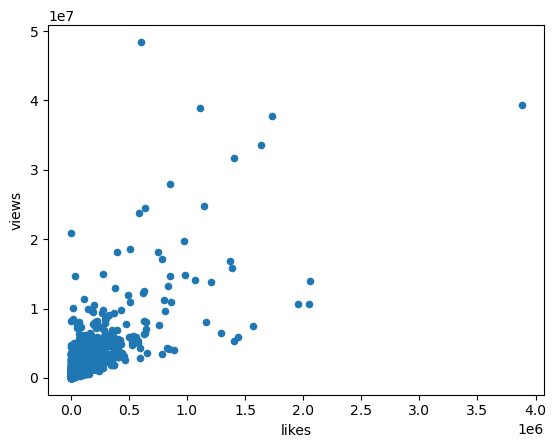

In [9]:
# scatter plot for likes and views
us_videos_df.plot(x='likes', y='views', kind="scatter")

<AxesSubplot:xlabel='dislikes', ylabel='views'>

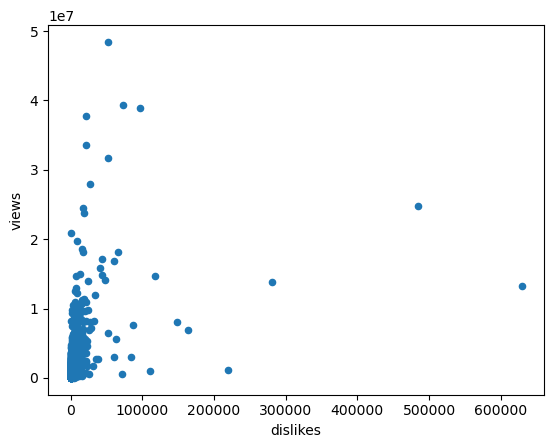

In [10]:
# scatter plot for dislikes and views
us_videos_df.plot(x='dislikes', y='views', kind="scatter")

<AxesSubplot:xlabel='comment_count', ylabel='views'>

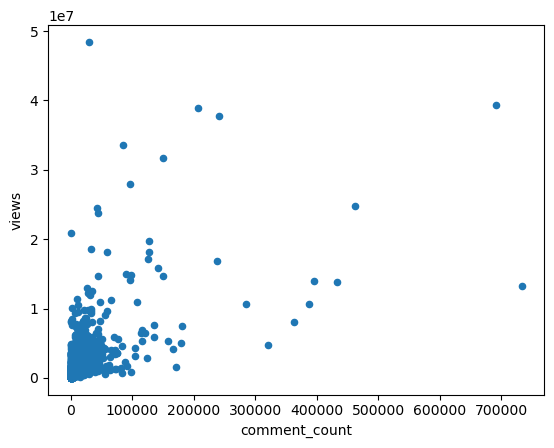

In [11]:
# scatter plot for comment_count and views
us_videos_df.plot(x='comment_count', y='views', kind="scatter")

In [12]:
# Create a dataframe for total videos by categories
count_by_cat = us_videos_df.groupby(['category_name']).count()['video_id']

count_by_cat_df = pd.DataFrame({"video_count": count_by_cat})

count_by_cat_df

,video_count
category_name,
Autos & Vehicles,70
Comedy,547
Education,250
Entertainment,1619
Film & Animation,318
Gaming,103
Howto & Style,595
Music,799
News & Politics,505


<AxesSubplot:xlabel='category_name'>

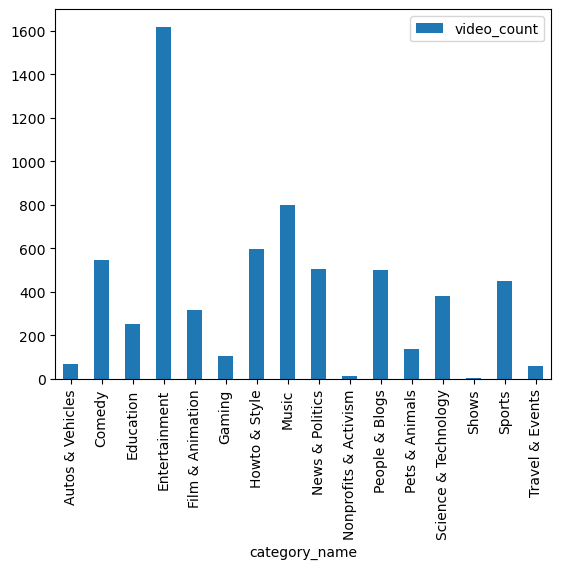

In [13]:
# Create a bar chart for count_by_cat_df
count_by_cat_df.plot(kind="bar")

In [14]:
# total views by category
total_views_by_cat = us_videos_df.groupby(['category_name']).sum()['views']

total_views_by_cat_df = pd.DataFrame({"total_views":total_views_by_cat})

total_views_by_cat_df

,total_views
category_name,
Autos & Vehicles,28445164
Comedy,422806173
Education,87994865
Entertainment,1322922283
Film & Animation,292697703
Gaming,124819911
Howto & Style,281517665
Music,1108709326
News & Politics,124950593


<AxesSubplot:xlabel='category_name'>

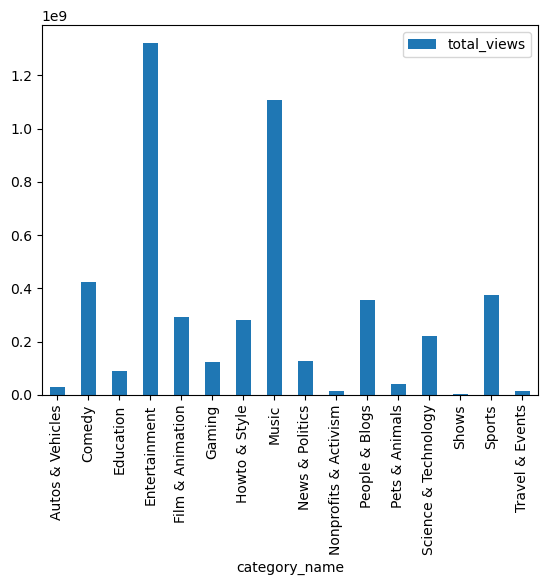

In [15]:
# Create a bar chart for total_views_by_cat_df
total_views_by_cat_df.plot(kind="bar")

In [16]:
# Total likes by categories
likes_by_cat = us_videos_df.groupby('category_name').sum()['likes']

likes_by_cat_df = pd.DataFrame({"total_likes" : likes_by_cat})

likes_by_cat_df

,total_likes
category_name,
Autos & Vehicles,449117
Comedy,21425434
Education,3853548
Entertainment,44247100
Film & Animation,9784712
Gaming,5125603
Howto & Style,14210038
Music,82644713
News & Politics,1950958


<AxesSubplot:xlabel='category_name'>

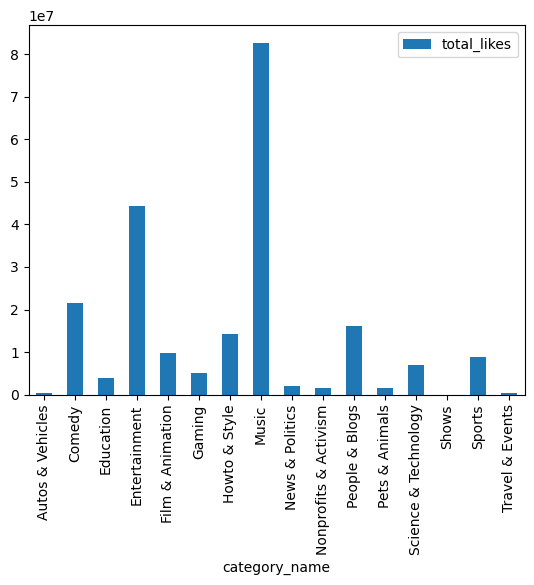

In [17]:
# Create a bar chart for total likes by categories
likes_by_cat_df.plot(kind="bar")

In [18]:
# Create top 10 creaters(channel_title) that has the most trending videos

count_by_creater = us_videos_df.groupby(["channel_title"]).count()['video_id']
count_by_creater_df = pd.DataFrame({"total_video_count":count_by_creater})
count_by_creater_df.sort_values(by="total_video_count", ascending=False).head(10)

,total_video_count
channel_title,
ESPN,84
TheEllenShow,74
The Tonight Show Starring Jimmy Fallon,72
Jimmy Kimmel Live,70
The Late Show with Stephen Colbert,58
Netflix,58
NBA,55
CNN,52
Vox,47
